In [1]:
#Plotten
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

#Numerisches Rechnen
import numpy as np

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

In [135]:
def figsize(scale):
    fig_width_pt = 469.755                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size


pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots
                                        #to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 10,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "pgf.rcfonts" : False,
    "lines.linewidth" : 0.5,
    "axes.linewidth" : 0.5,
#    "axes.linestyle" : '.',
    "axes.spines.right" : False,
    "axes.spines.top" : False,
    "axes.grid"           : False,
    "grid.linestyle": 'dotted',
    "grid.color"       :   '#808080',
    "legend.frameon" : True,
    "axes.prop_cycle" : plt.cycler('color', ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']),

    "figure.figsize": figsize(1.0),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",       # plots will be generated using this preamble
        r"\usepackage{amssymb}",
        ]
    }

plt.matplotlib.rcParams.update(pgf_with_latex)


In [3]:
def arrowed_spines(ax=None, arrow_length=5, labels=('', ''), arrowprops=None):
    xlabel, ylabel = labels
    if ax is None:
        ax = plt.gca()
    if arrowprops is None:
        arrowprops = dict(arrowstyle='<-', facecolor='black', linewidth='0.5', shrinkB=20)

    for i, spine in enumerate(['left', 'bottom']):
        # Set up the annotation parameters
        t = ax.spines[spine].get_transform()
        xy, xycoords = [1, 0], ('axes fraction', t)
        xytext, textcoords = [arrow_length , 0], ('offset points', t)
        ha, va = 'left', 'bottom'

        # If axis is reversed, draw the arrow the other way
        bottom, top = ax.spines[spine].axis.get_view_interval()
        if top < bottom:
            xy[0] = 0
            xytext[0] *= -1
            ha, va = 'right', 'top'

        if spine is 'bottom':
            xarrow = ax.annotate(xlabel, xy, xycoords=xycoords, xytext=xytext, 
                        textcoords=textcoords, ha=ha, va='center',
                        arrowprops=arrowprops, annotation_clip=True)
        else:
            yarrow = ax.annotate(ylabel, xy[::-1], xycoords=xycoords[::-1], 
                        xytext=xytext[::-1], textcoords=textcoords[::-1], 
                        ha='center', va=va, arrowprops=arrowprops)
    return xarrow, yarrow

In [240]:
def draw_support(ax, a=1, s=0, t=(0,0)):
    vertices = np.array([[(s-np.sqrt(a))/(2*a), 1/(2*a)],
                [(s+np.sqrt(a))/(2*a), 1/(2*a)],
                [2*(s+np.sqrt(a))/a, 2/a],
                [2*(s-np.sqrt(a))/a, 2/a]])
#    label=r'$supp ~(\hat\psi_{ast})$' + '\n' + r'$a = $ ' + str(a) + '\n' +  r'$s = $ ' + str(s)
#    supp = matplotlib.patches.Polygon(vertices, True, lw=0.5)
    ax.fill(vertices[0:,0],vertices[0:,1], lw=0.5, ls='-',color='grey', ec='black', fill=True,  alpha=0.5, aa=True)
#    ax.text(4*s/(3*a),4/(3*a), label,  fontsize=10, color="black",horizontalalignment='center',verticalalignment='center')
def supp_center_coords(a,s):
    return(4*s/(3*a),4/(3*a))

# Plots für $\Delta_m$

In [231]:
def omega(k,m):
    return np.sqrt(k**2+m**2)

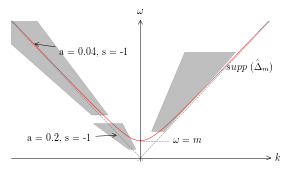

In [248]:
m=5
k = np.linspace(-40,40,200)
omega_data = omega(k,m)


fig, ax = plt.subplots(figsize=(4,2.35))
ax.plot(k,omega_data, label=r'$supp (\Delta_m)$')
ax.plot(k,k, ls='--', color='grey')
ax.plot(k,-k, ls='--', color='grey')

arrowprops = dict(arrowstyle='->', facecolor='black', linewidth='0.5')
draw_support(ax, a=0.2, s=-1)
ax.annotate("a = 0.2, s = -1", supp_center_coords(0.2,-1), xytext=(-7*m,m),xycoords='data',arrowprops=arrowprops)
draw_support(ax, a=0.04, s=-1)
ax.annotate("a = 0.04, s = -1", supp_center_coords(0.04,-1), xytext=(-5*m,6*m),xycoords='data',arrowprops=arrowprops)
draw_support(ax, a=0.065, s=0.7)
ax.annotate("a = 0.2, s = -1", supp_center_coords(0.2,-1), xytext=(-7*m,m),xycoords='data',arrowprops=arrowprops)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim([-40,40])
ax.set_ylim([-1,40])

ax.axhline(y=m, xmin=0.5, xmax=.61, color="grey", ls='--')
ax.text(2*m, m-0.5, r"$\omega = m$", fontsize=10, color="black")
ax.text(5.3*m, 5*m, r"$supp~(\hat\Delta_m)$", fontsize=10, color="black")



arrowed_spines(ax=ax,labels=(r'$k$',r'$\omega$'))
#leg = ax.legend(loc=1)
#leg.get_frame().set_linewidth(0.5)

fig.tight_layout()

fig.savefig("delta_m.pgf")
fig.savefig("delta_m.pdf")

In [243]:
ax.annotate?

# Plots für  $\hat{\Delta_m^2}$

In [219]:
def delta_m2(k,w,m):
    res = np.heaviside(w**2-k**2-4*m**2,1)*2*(w**2-k**2-3*m**2)/(np.sqrt(w**2-k**2)*np.sqrt(w**2-k**2-4*m**2))
    return res

def color_picker(y,ymax,ymin):
    cmap = matplotlib.cm.get_cmap('viridis')
#    print((y-ymin)/(ymax-ymin))
    color = cmap((y-ymin)/(ymax-ymin))
    return color

In [220]:
m=5.0
kmax = 40
omegamin = -2
omegamax = 40
k = np.linspace(-40,40,1000)
w = np.linspace(omegamin,omegamax,1000)
omega_data = omega(k,m)
K,W = np.meshgrid(k, w)
delta_m2_data = delta_m2(K,W,m)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


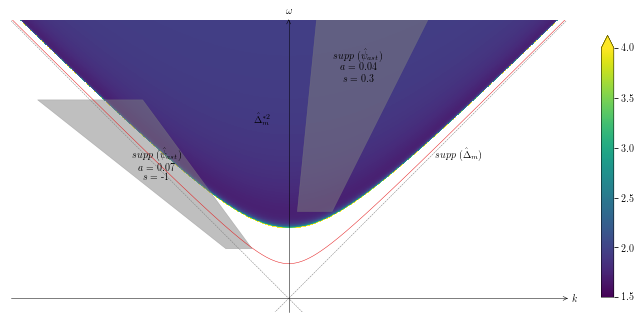

In [223]:
fig, ax = plt.subplots(figsize=(10,5.5))
ax.plot(k,omega_data, label=r'$supp ~(\hat\Delta_m)$')
ax.plot(k,k, ls='--', color='grey')
ax.plot(k,-k, ls='--', color='grey')

levels=list(np.logspace(-5,1.7,100))

im = ax.imshow(delta_m2_data,vmin=1.5,vmax=4,extent=[-40,40,-2,40], origin='lower',label=r'$\hat\Delta_m^{*2}$')

draw_support(ax, a=0.04, s=0.3)
draw_support(ax, a=0.07, s=-1)

ax.set_xlim([-kmax,kmax])
ax.set_ylim([omegamin,omegamax])

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.set_xticks([])
ax.set_yticks([])
arrowed_spines(ax=ax,labels=(r'$k$',r'$\omega$'))

plt.colorbar(im,shrink=0.7,extend='max')
ax.text(4.2*m, 4*m, r"$supp~(\hat\Delta_m)$", fontsize=10, color="black")
ax.text(-m, 5*m, r'$\hat\Delta_m^{*2}$', fontsize=10, color="black")
#leg = ax.legend(loc=1)
#leg.get_frame().set_linewidth(0.5)

fig.tight_layout()
fig.savefig("delta_m2.pgf")
fig.savefig("delta_m2.pdf")

In [202]:
plt.colorbar?

In [178]:
plt.imshow?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


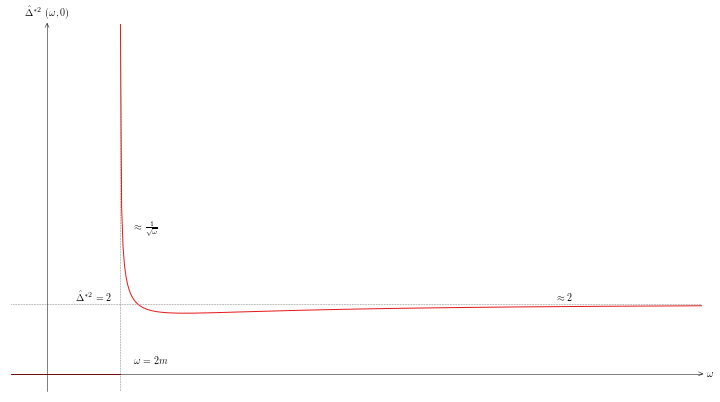

In [134]:
w = np.linspace(0,10,1000)
w2 = np.linspace(-2,2,10)
data2 = np.zeros_like(w2)
delta_m2_data=delta_m2(0,w,1)
#delta_m2_data[0:200] = 0.0
fig, ax = plt.subplots(figsize=(10,5.5))
ax.plot(w,delta_m2_data,lw=1,c='#e41a1c')
ax.plot(w2,data2,lw=1,c='#e41a1c')

ax.vlines(2,-1,10,colors='grey',linestyles='--')
ax.text(2.1,0.3, r'$\omega = 2 m$')
ax.axhline(2,-1,10,color='grey',ls='--')
ax.text(1.7,2.1, r'$\hat \Delta^{*2} = 2$')
ax.text(2.1,4, r'$\approx \frac{1}{\sqrt{\omega}}$')
ax.text(5,2.1, r'$\approx 2$')


ax.spines['left'].set_position(('data',1.5))
ax.spines['bottom'].set_position('zero')
ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim([1.25,6])
ax.set_ylim([-0.5,10])


arrowed_spines(ax=ax,labels=(r'$\omega$',r'$\hat\Delta^{*2} ~(\omega, 0)$'))
#leg = ax.legend(loc=1)
#leg.get_frame().set_linewidth(0.5)

fig.tight_layout()

fig.savefig("delta_m2_k0.pgf")
fig.savefig("delta_m2_k0.pdf")

# Plots für $\hat\Delta_m^{\circledast 2}$

In [207]:
def delta_m2(k,w,m):
    return np.heaviside(w**2-k**2-4*m**2,1)*2*(w**2-k**2-3*m**2)/(np.sqrt(w**2-k**2)*np.sqrt(w**2-k**2-4*m**2))
    
def phi(k,w,m):
    return(0.5*(k**2-w**2)*np.sqrt(1.0/4+m**2/(k**2-w**2)))

def delta_m2_twisted(k,w,m):
    return delta_m2(k,w,m)*np.cos(phi(k,w,m))

def color_picker(y,ymax,ymin):
    cmap = matplotlib.cm.get_cmap('viridis')
#    print((y-ymin)/(ymax-ymin))
    color = cmap((y-ymin)/(ymax-ymin))
    return color

In [210]:
m=2.0
kmax = 20
omegamin = -1
omegamax = 20
k = np.linspace(-20,20,1000)
w = np.linspace(omegamin,omegamax,1000)
omega_data = omega(k,m)
K,W = np.meshgrid(k, w)
delta_m2_data = delta_m2_twisted(K,W,m)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


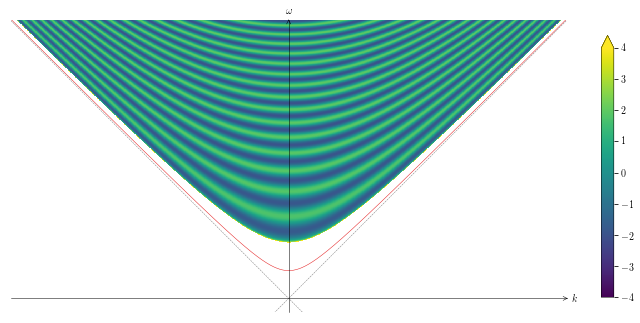

In [217]:
fig, ax = plt.subplots(figsize=(10,5.5))
ax.plot(k,omega_data, label=r'$supp ~(\hat\Delta_m)$')
ax.plot(k,k, ls='--', color='grey')
ax.plot(k,-k, ls='--', color='grey')

im = ax.imshow(delta_m2_data,vmin=-4,vmax=4,extent=[-20,20,-1,20], origin='lower',label=r'$\hat\Delta_m^{\circledast 2}$',alpha=1)
    
#draw_support(ax, a=0.04, s=0.3)
#draw_support(ax, a=0.07, s=-1)

ax.set_xlim([-kmax,kmax])
ax.set_ylim([omegamin,omegamax])

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.set_xticks([])
ax.set_yticks([])
arrowed_spines(ax=ax,labels=(r'$k$',r'$\omega$'))

plt.colorbar(im,shrink=0.7,extend='max')
#leg = ax.legend(loc=1)
#leg.get_frame().set_linewidth(0.5)

fig.tight_layout()
fig.savefig("delta_m2_twisted.pgf")
fig.savefig("delta_m2_twisted.pdf")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


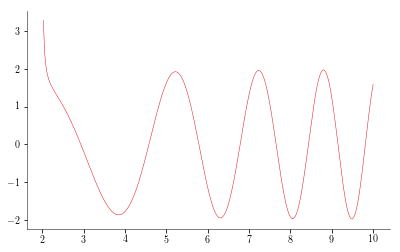

In [187]:
w = np.linspace(2*m,10,300)
data = delta_m2_twisted(0,w,m)
plt.plot(w,data)
plt.show()

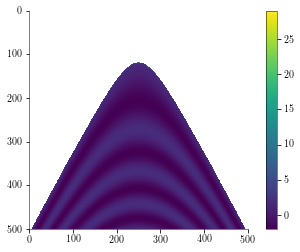

In [188]:
blubb=plt.imshow(delta_m2_data)
plt.colorbar(blubb)